In [30]:
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind



In [13]:
os.getcwd()

full_path = "/home/gus/Documents/REPOS/tmt-analysis/data/processed"
base_path = str(Path(full_path).parents[1])  # "path"


In [14]:
CLASSIFICATION_TARGET = 'group'
def join_on_subject(df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    # Avoid duplicating group column if it exists in both DataFrames
    if CLASSIFICATION_TARGET in df1.columns and CLASSIFICATION_TARGET in df2.columns:
        df2 = df2.drop(columns=CLASSIFICATION_TARGET)

    return pd.merge(df1, df2, on='subject_id', how='inner')

def load_all_datasets() -> dict:
    path = base_path + '/data/processed'
    return {
        'df_digital_tmt_with_target': pd.read_csv(os.path.join(path, 'df_digital_tmt_with_target.csv')),
        'demographic_df': pd.read_csv(os.path.join(path, 'demographic_df.csv')),
        'non_digital_df': pd.read_csv(os.path.join(path, 'non_digital_df.csv')),
    }

datasets = load_all_datasets()

df_demo = datasets['demographic_df']


df_digital_plus_demo = join_on_subject(datasets['df_digital_tmt_with_target'], datasets['demographic_df'])

df_non_digital = datasets['non_digital_df']

df_digital = datasets['df_digital_tmt_with_target']

df_non_digital_plus_demo = join_on_subject(datasets['non_digital_df'], datasets['demographic_df'])



In [44]:
kbest = {'average_duration_PART_B': 0.0475321612303589, 'distance_difference_from_ideal_PART_A': 0.03383053449026025, 'hesitation_time_PART_A': 0.046492290357927936, 
         'intra_target_time_PART_A': 0.041340383709062074, 'max_duration_PART_B': 0.05584613359180039, 'non_cut_correct_targets_touches_PART_A': 0.07159284954763334, 
         'non_cut_correct_targets_touches_PART_B': 0.0844026195472562, 'non_cut_rt_PART_A': 0.04888538684282573, 'non_cut_rt_PART_B': 0.08281456718355108, 
         'rt_PART_A': 0.038857580277840344, 'rt_PART_B': 0.011247750113221253, 'search_time_PART_B': 0.02417236521366346, 'total_distance_PART_A': 0.005538270121558623, 
         'travel_distance_PART_B': 0.04022394055406963, 'travel_time_PART_A': 0.03880206847726513, 'non_cut_correct_targets_touches_B_A_ratio': 0.0579972396471236, 
         'state_transitions_B_A_ratio': 0.05581030824788367, 'travel_avg_speed_B_A_ratio': 0.03821137973570969, 'is_valid_sum_B': 0.035066329534672286, 
         'age': 0.04733906044096322, 'hesitation_distance_PART_A': 0.020804811208475566, 'max_duration_PART_A': 0.031851647601239506, 
         'average_duration_B_A_ratio': 0.02701095917651765, 'average_duration_PART_A': 0.0018094245807042926, 'search_avg_speed_PART_B': 0.0012888558261973002, 
         'max_duration_B_A_ratio': 0.001099900477135038, 'travel_distance_B_A_ratio': 0.0015405276863517275, 'is_valid_sum_A': 0.0041886799147946826, 
         'state_transitions_PART_A': 0.001505982511473519, 
         'search_time_PART_A': 0.0018459883877542738, 'total_hesitations_PART_A': 0.0005680645844267244, 'travel_time_PART_B': 0.00048193918028287703}

In [46]:
kbest_list = list(kbest.keys())

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind

def histograms_for_col(df):
    results = []  
    
    for col in df.columns[1:-1]:   # adjust depending on your column layout
        groups = [data[col].dropna() for _, data in df.groupby("group")]

        # Welch’s t-test
        t_stat, p_val = ttest_ind(groups[0], groups[1], equal_var=False)

        # Format p-value for plot
        if p_val < 0.001:
            p_str = f"{p_val:.2e}"
        else:
            p_str = f"{p_val:.3f}"

        # Plot histograms
        for label, data in df.groupby("group"):
            plt.hist(data[col], bins=10, alpha=0.5, label=f"Group {label}")

        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"{col} (t={t_stat:.2f}, p={p_str})")
        plt.legend()
        plt.show()

        # Save raw values (keep numeric p for sorting/filtering later)
        results.append({"variable": col, "t_stat": t_stat, "p_value": p_val})

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df


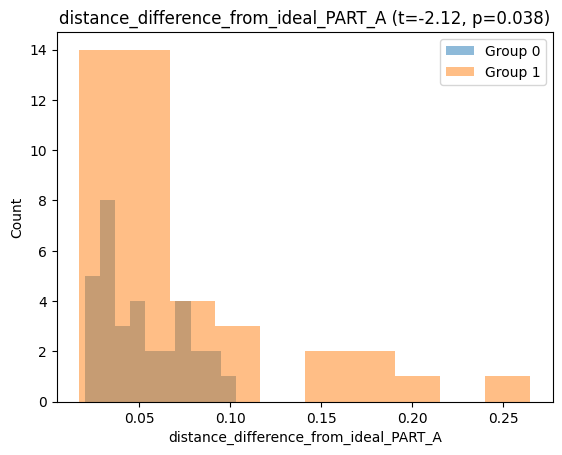

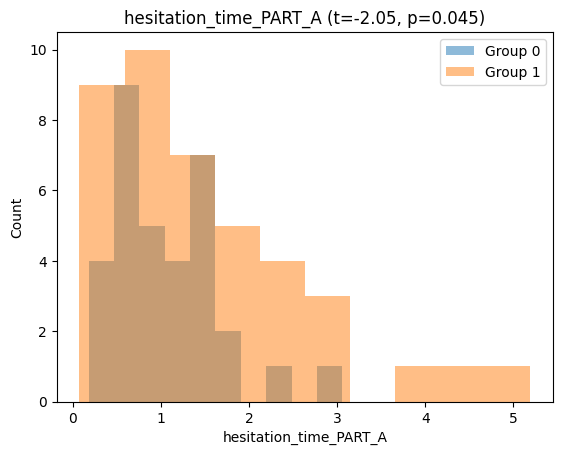

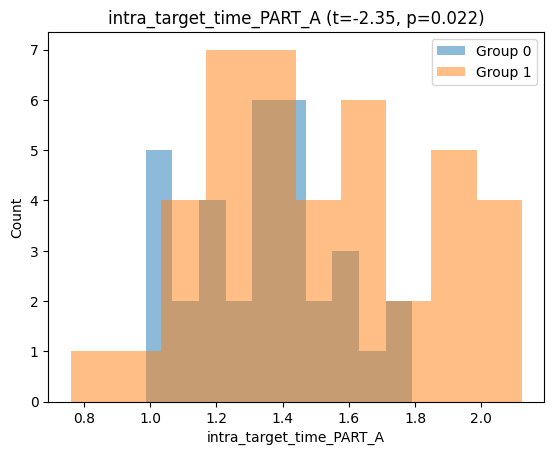

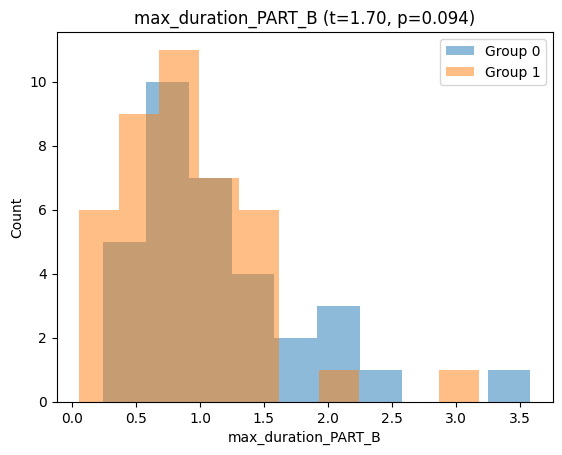

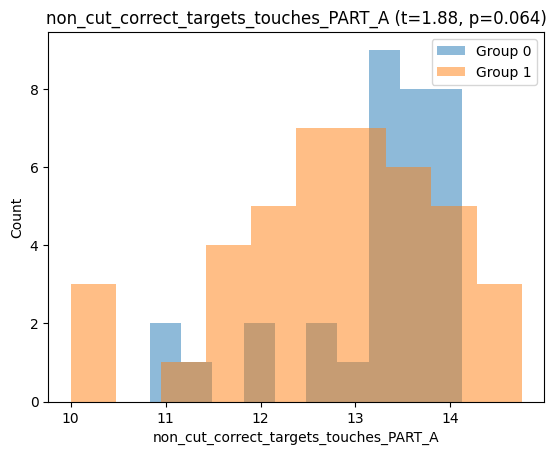

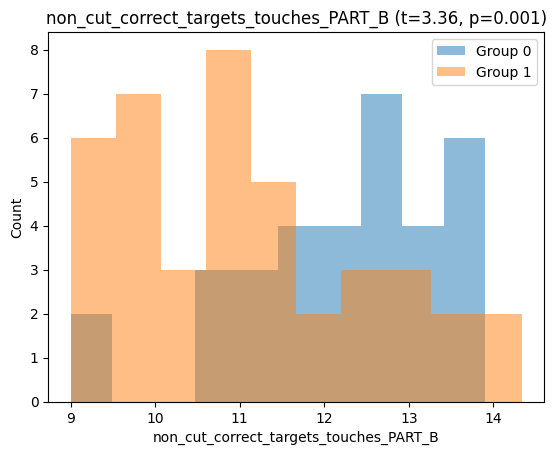

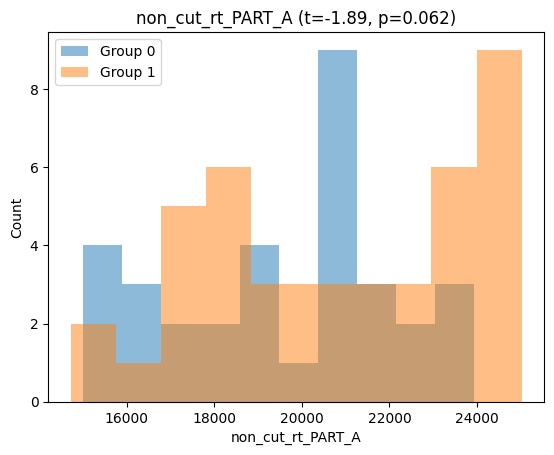

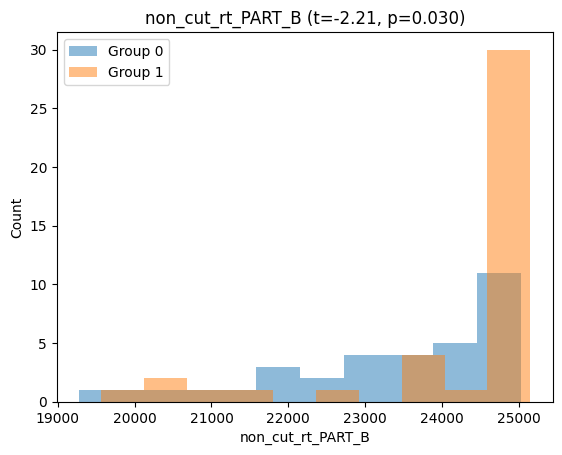

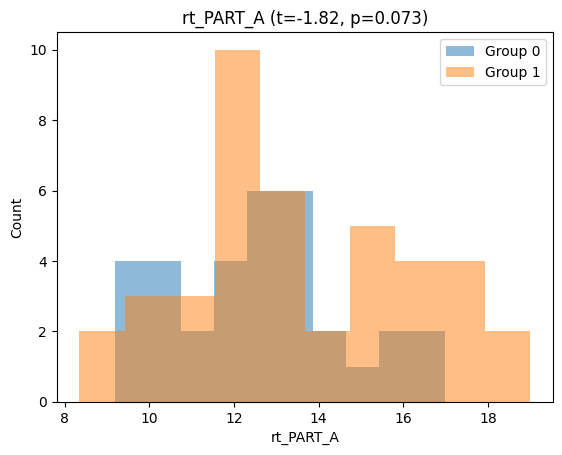

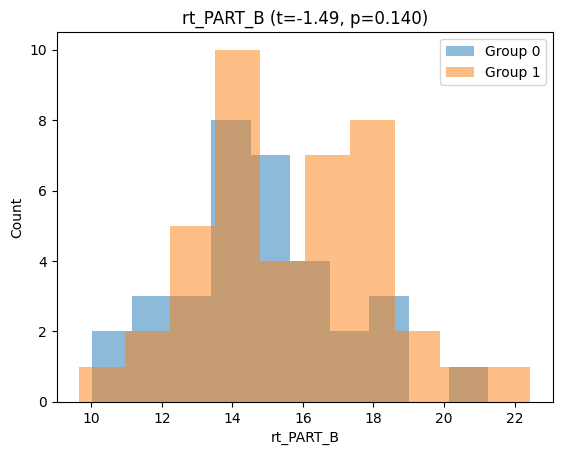

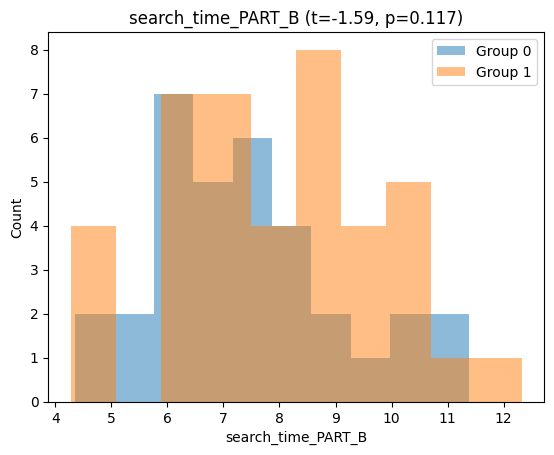

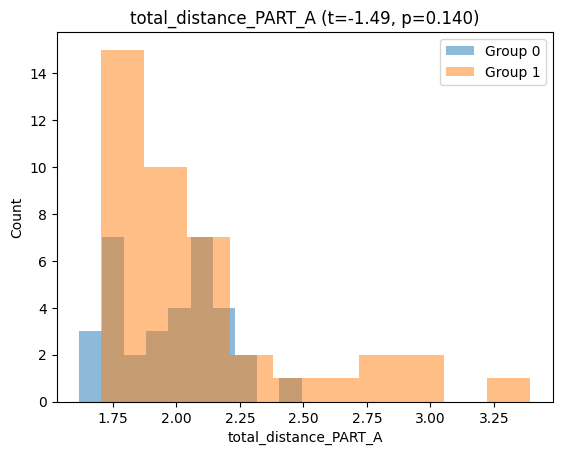

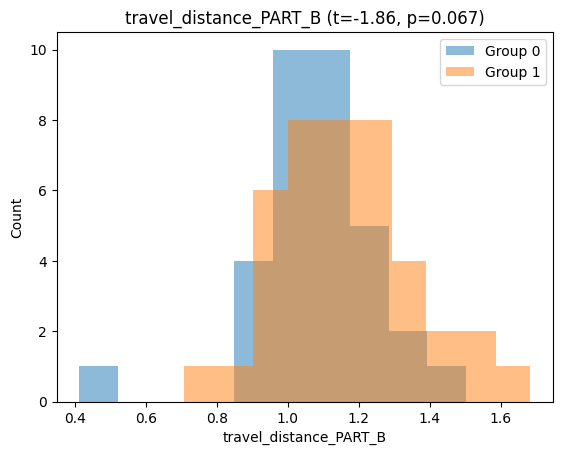

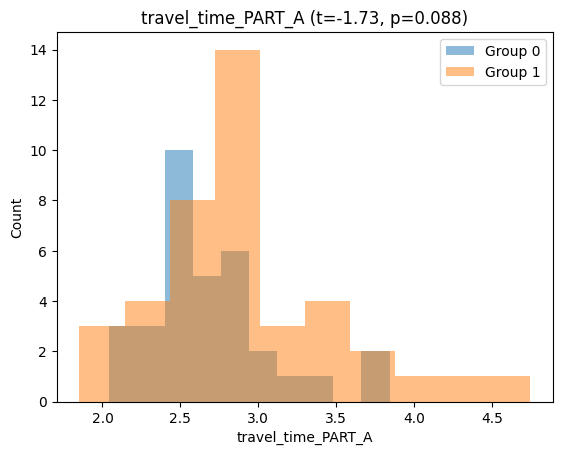

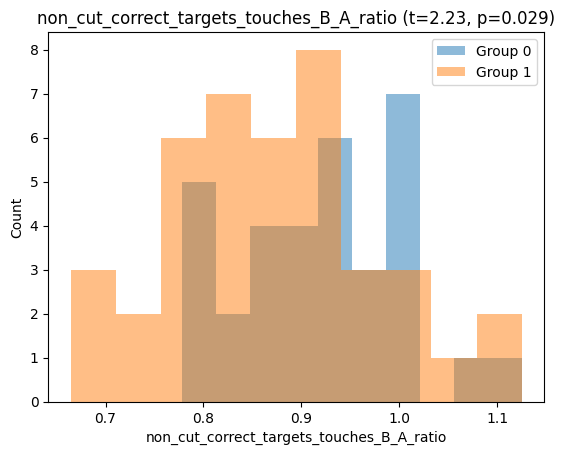

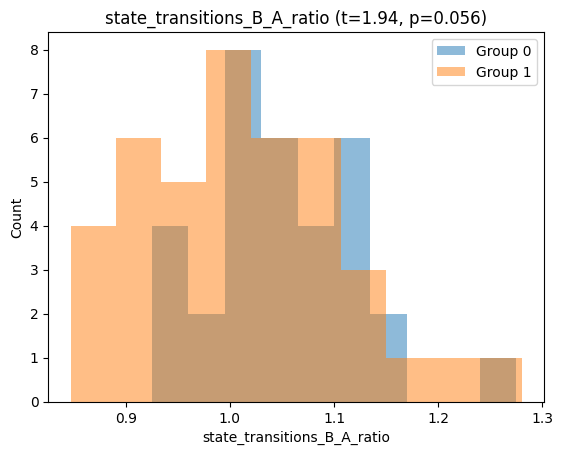

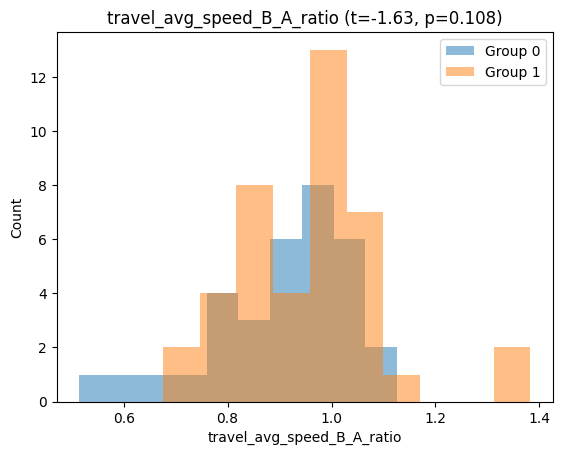

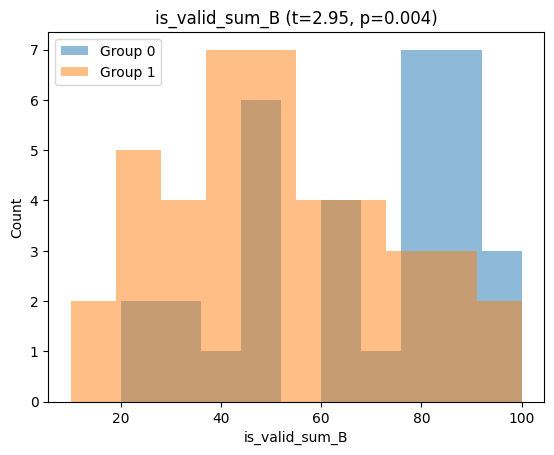

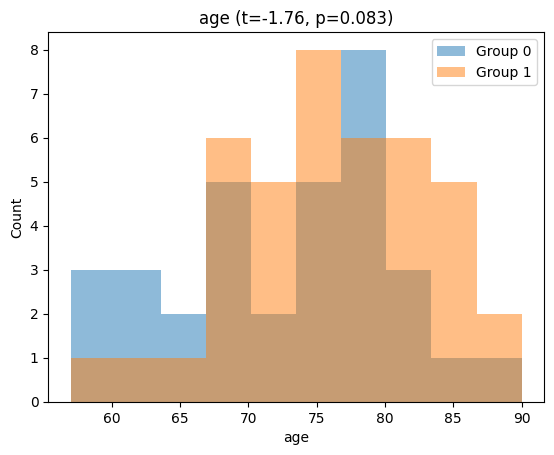

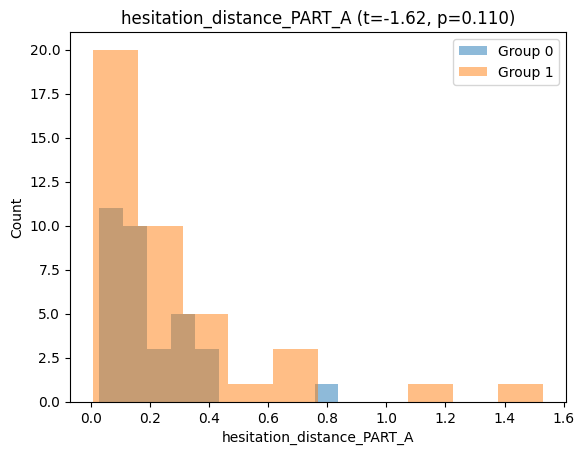

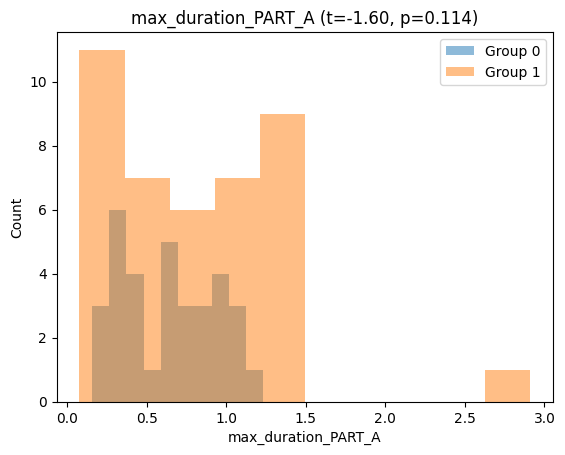

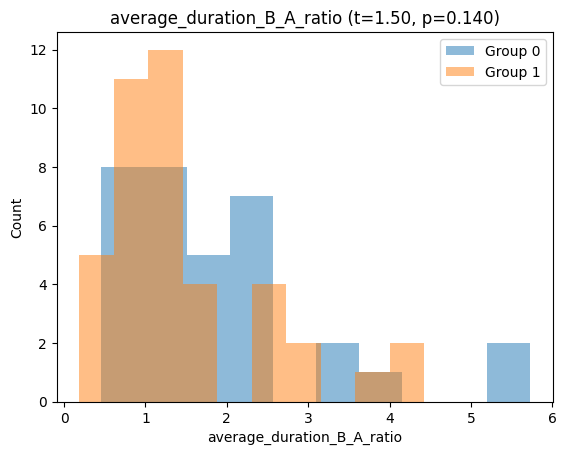

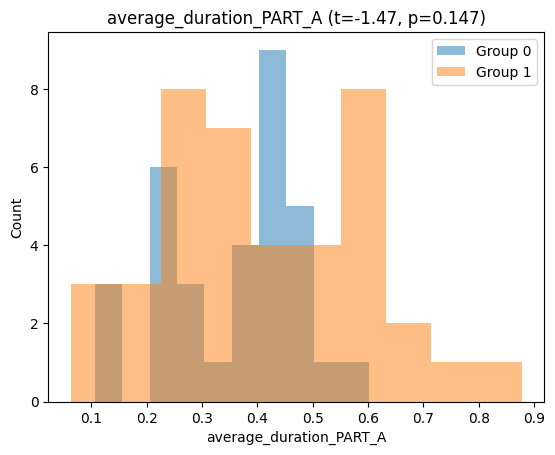

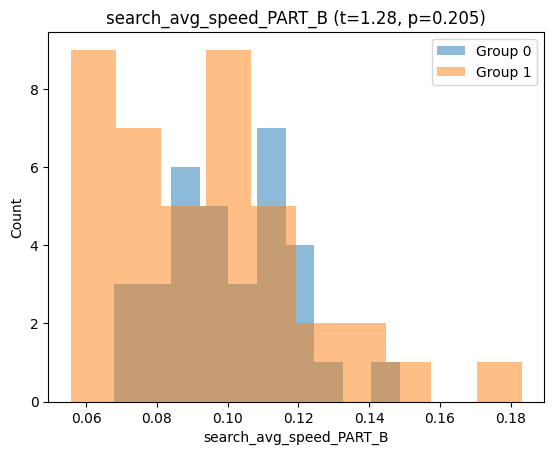

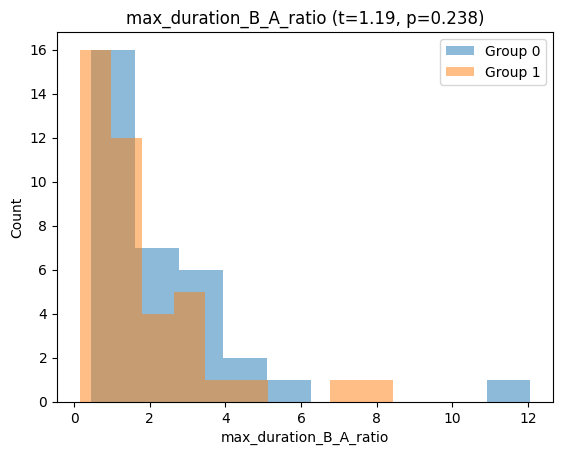

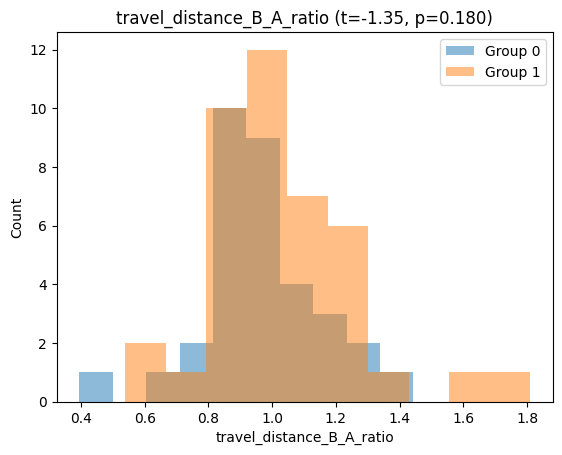

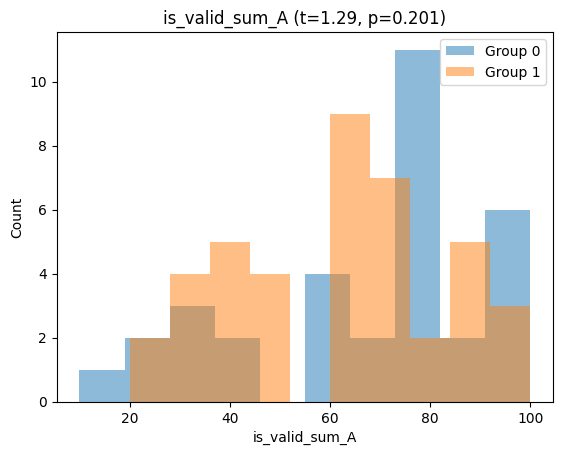

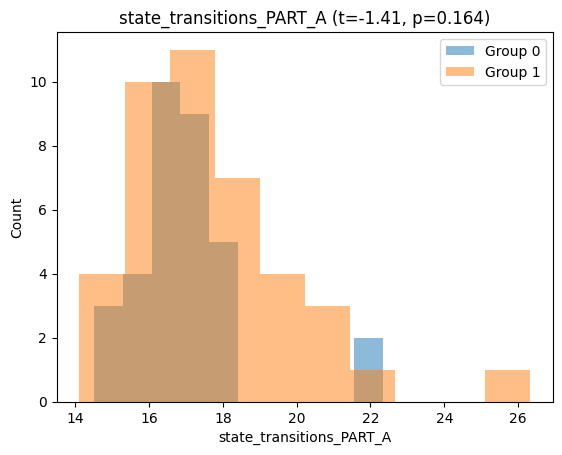

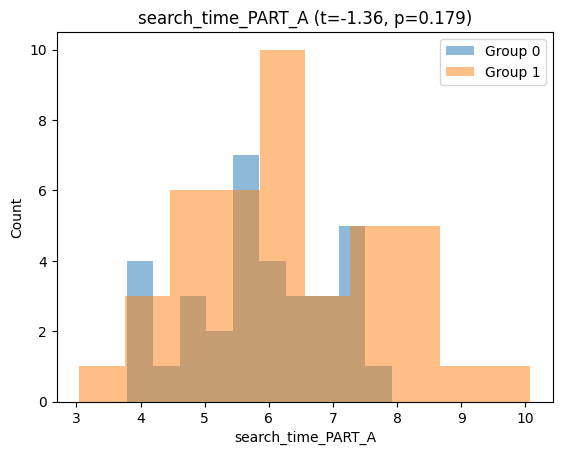

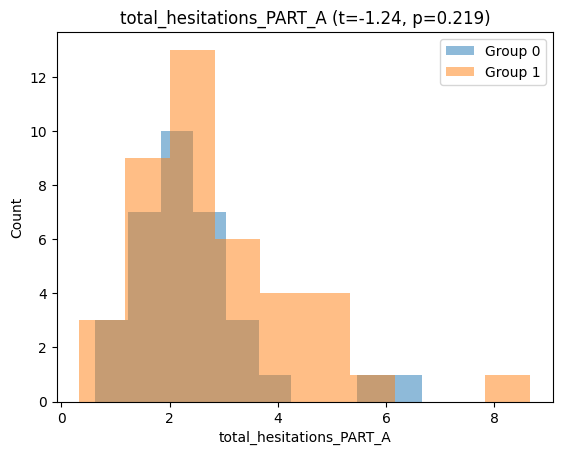

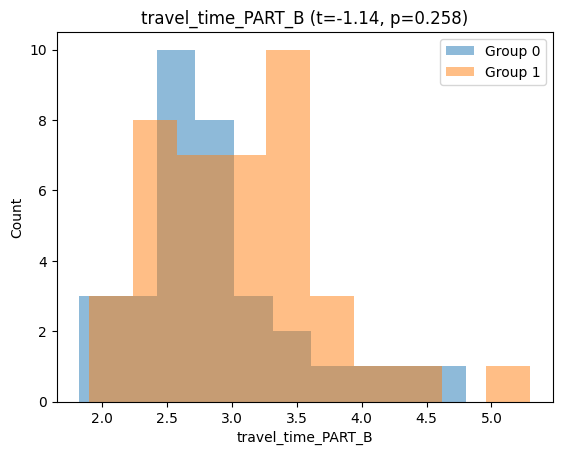

In [48]:
res_digital = histograms_for_col(df_digital_plus_demo[kbest_list + ['group']])

In [42]:
res_non_digital[~res_non_digital['variable'].str.endswith('z')]

,variable,t_stat,p_value
0,mmse,4.263107,0.000063
1,tmt_a_raw,-3.977143,0.000174
3,tmt_b_raw,-5.366270,0.000002
5,digit_symbol_raw,2.993168,0.003839
7,forward_digit_span_raw,1.116367,0.268919
9,backward_digit_span_raw,2.607027,0.011110
11,clock_drawing_test,2.504177,0.014579
